# Exploring  Popular Data Science Questions

___

## Introduction
The aim of this project is to discover what data science content people would be most interested in learning. 

We will be using [Stack Exchange](https://stackexchange.com/), a question and answer website network, to achieve our goal. Stack Exchange hosts a multitude of sites covering different fields and subjects such as mathematics, physics, philosphy, and data science. Stack Exchange utilizes an upvote/downvote system on questions and answers to help ensure quality posts can be easily identified.

<img src="photos/se_sites.png" alt="List of Stack Exchange sites" title="Stack Exchange Sites" style="padding-top: 15px"/>

Since data science is a multidisciplinary field, there is one than one Stack Exchange site that's relevant to our mission.
- [Artificial Intelligence](https://ai.stackexchange.com)
- [Data Science](https://datascience.stackexchange.com)
- [Cross Validated](https://stats.stackexchange.com)
- [Mathematics](https://math.stackexchange.com)
- [Stack Overflow](https://stackoverflow.com)

Using [this link](https://stackexchange.com/sites?view=list#percentanswered), you'll see a complete list of Stack Exchange sites sorted by the percentage of questions answered. At the time of writing this, Data Science Stack Exchange (DSSE) is in the bottom 15 in regards to this metric with only 67% of questions being answered.

Given that DSSE is dedicated to data science, and has a lot of unanswered questions, makes it's an ideal choice for our investigation. We'll be focusing on DSSE for tis guided project.
___

## Stack Exchange Data Explorer
Instead of scraping DSSE, we can use the [Stack Exchange Data Explorer](https://data.stackexchange.com/datascience/query/new) to explore and access its data. This tool uses uses a Microsoft's dialect of SQL called Transact-SQL.

Examining the schema below, we can see that the DSSE site uses 29 tables:

<img src="photos/schema.png" alt="DSSE Database Schema" title="DSSE Database Schema" style="padding-top: 15px"/>

Let's explore some of the tables from the DSSE database by writing queries and downloading their results from the Stack Exchange Data Explorer.

### `Posts` Table

<code>SELECT TOP 10 Id, PostTypeId, CreationDate, 
              AcceptedAnswerId, Score, 
              ViewCount, Tags, AnswerCount, 
              CommentCount, FavoriteCount 
  FROM Posts;<code\>

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
import seaborn as sns
import numpy as np

pd.read_csv('CSVs/1_posts_query.csv')

,Id,PostTypeId,CreationDate,AcceptedAnswerId,Score,ViewCount,Tags,AnswerCount,CommentCount,FavoriteCount
0,5,1,2014-05-13 23:58:30,NaN,9,953.0,<machine-learning>,1.0,1,NaN
1,7,1,2014-05-14 00:11:06,10.0,4,500.0,<education><open-source>,3.0,4,NaN
2,9,2,2014-05-14 00:36:31,NaN,5,NaN,NaN,NaN,0,NaN
3,10,2,2014-05-14 00:53:43,NaN,13,NaN,NaN,NaN,1,NaN
4,14,1,2014-05-14 01:25:59,29.0,26,1920.0,<data-mining><definitions>,4.0,1,NaN
5,15,1,2014-05-14 01:41:23,NaN,2,656.0,<databases>,0.0,1,NaN
6,16,1,2014-05-14 01:57:56,46.0,17,433.0,<machine-learning><bigdata><libsvm>,2.0,0,NaN
7,17,5,2014-05-14 02:49:14,NaN,0,NaN,NaN,NaN,0,NaN
8,18,4,2014-05-14 02:49:14,NaN,0,NaN,NaN,NaN,0,NaN
9,19,1,2014-05-14 03:56:20,37.0,94,20005.0,<bigdata><scalability><efficiency><performance>,12.0,5,NaN


**Observations**
* Perhaps we can determine a posts popularity using the `Score`, `ViewCount`, `AnswerCount`, `CommentCount`, and `FavoriteCount` columns.
* The `AcceptedAnswerId` and `FavoriteCount` columns contain NaN values. We'll need to investigate this further and see if we can alter these values.
* There are different types of posts as seen by the `PostTypeId` column.

Let's see what each `PostTypeId` pertains to and how many there are of each.

<code>SELECT p.PostTypeId, pt.Name, 
       COUNT(*) as NrOfPosts
  FROM posts AS p
  JOIN PostTypes AS pt ON p.PostTypeID = pt.Id
 GROUP BY p.PostTypeId, pt.Name
 ORDER BY NrOfPosts DESC;<code\>

In [2]:
pd.read_csv('CSVs/2_posts_number_query.csv')

,PostTypeId,Name,NrOfPosts
0,2,Answer,41198
1,1,Question,36701
2,4,TagWikiExcerpt,333
3,5,TagWiki,333
4,6,ModeratorNomination,14
5,7,WikiPlaceholder,1


Most posts are either questions or answers, with the other types of posts being very rare.

### `Tags` Table

<code>SELECT TOP 10 Id, TagName, Count
  FROM Tags
 ORDER BY Count DESC;<code\>

In [3]:
pd.read_csv('CSVs/3_tags_query.csv')

,Id,TagName,Count
0,2,machine-learning,11346
1,46,python,6683
2,194,deep-learning,4853
3,81,neural-network,4362
4,77,classification,3259
5,324,keras,2731
6,47,nlp,2709
7,128,scikit-learn,2301
8,321,tensorflow,2196
9,72,time-series,1870


___

## Extracting and Exploring the Data
To narrow our analysis, we'll be focusing on question posts.

<code>SELECT Id, CreationDate, AcceptedAnswerId, 
       Score, ViewCount, Tags, AnswerCount, 
       CommentCount, FavoriteCount 
  FROM posts
 WHERE PostTypeId = 1
 ORDER BY CreationDate DESC;<code\>

In [4]:
all_questions = pd.read_csv('CSVs/4_posts_all_questions_query.csv')
all_questions.head()

,Id,CreationDate,AcceptedAnswerId,Score,ViewCount,Tags,AnswerCount,CommentCount,FavoriteCount
0,126612,2024-01-26 18:53:32,NaN,0,20,<machine-learning><neural-network>,0,0,NaN
1,126611,2024-01-26 16:12:49,NaN,0,14,<statistics><excel><project-planning>,0,0,NaN
2,126610,2024-01-26 15:30:41,NaN,0,16,<machine-learning><classification><probability...,0,0,NaN
3,126609,2024-01-26 15:28:04,NaN,0,10,<generative-models><score><density-estimation>...,0,0,NaN
4,126604,2024-01-26 05:17:00,NaN,3,568,<batch-normalization>,1,1,NaN


The `tags` column has each tag contained between a Less-Than and Great-Than sign. We should fix this by removing those symbols and instead seperating each tag by commas.

It also appears some columns contain empty values (NaN). Let's see how empty these columns are.

Number of question posts  36701

Number of missing values:
Id                      0
CreationDate            0
AcceptedAnswerId    24608
Score                   0
ViewCount               0
Tags                    0
AnswerCount             0
CommentCount            0
FavoriteCount       36116
dtype: int64

Percentage of missing values:
Id                   0.0
CreationDate         0.0
AcceptedAnswerId    67.0
Score                0.0
ViewCount            0.0
Tags                 0.0
AnswerCount          0.0
CommentCount         0.0
FavoriteCount       98.0
dtype: float64


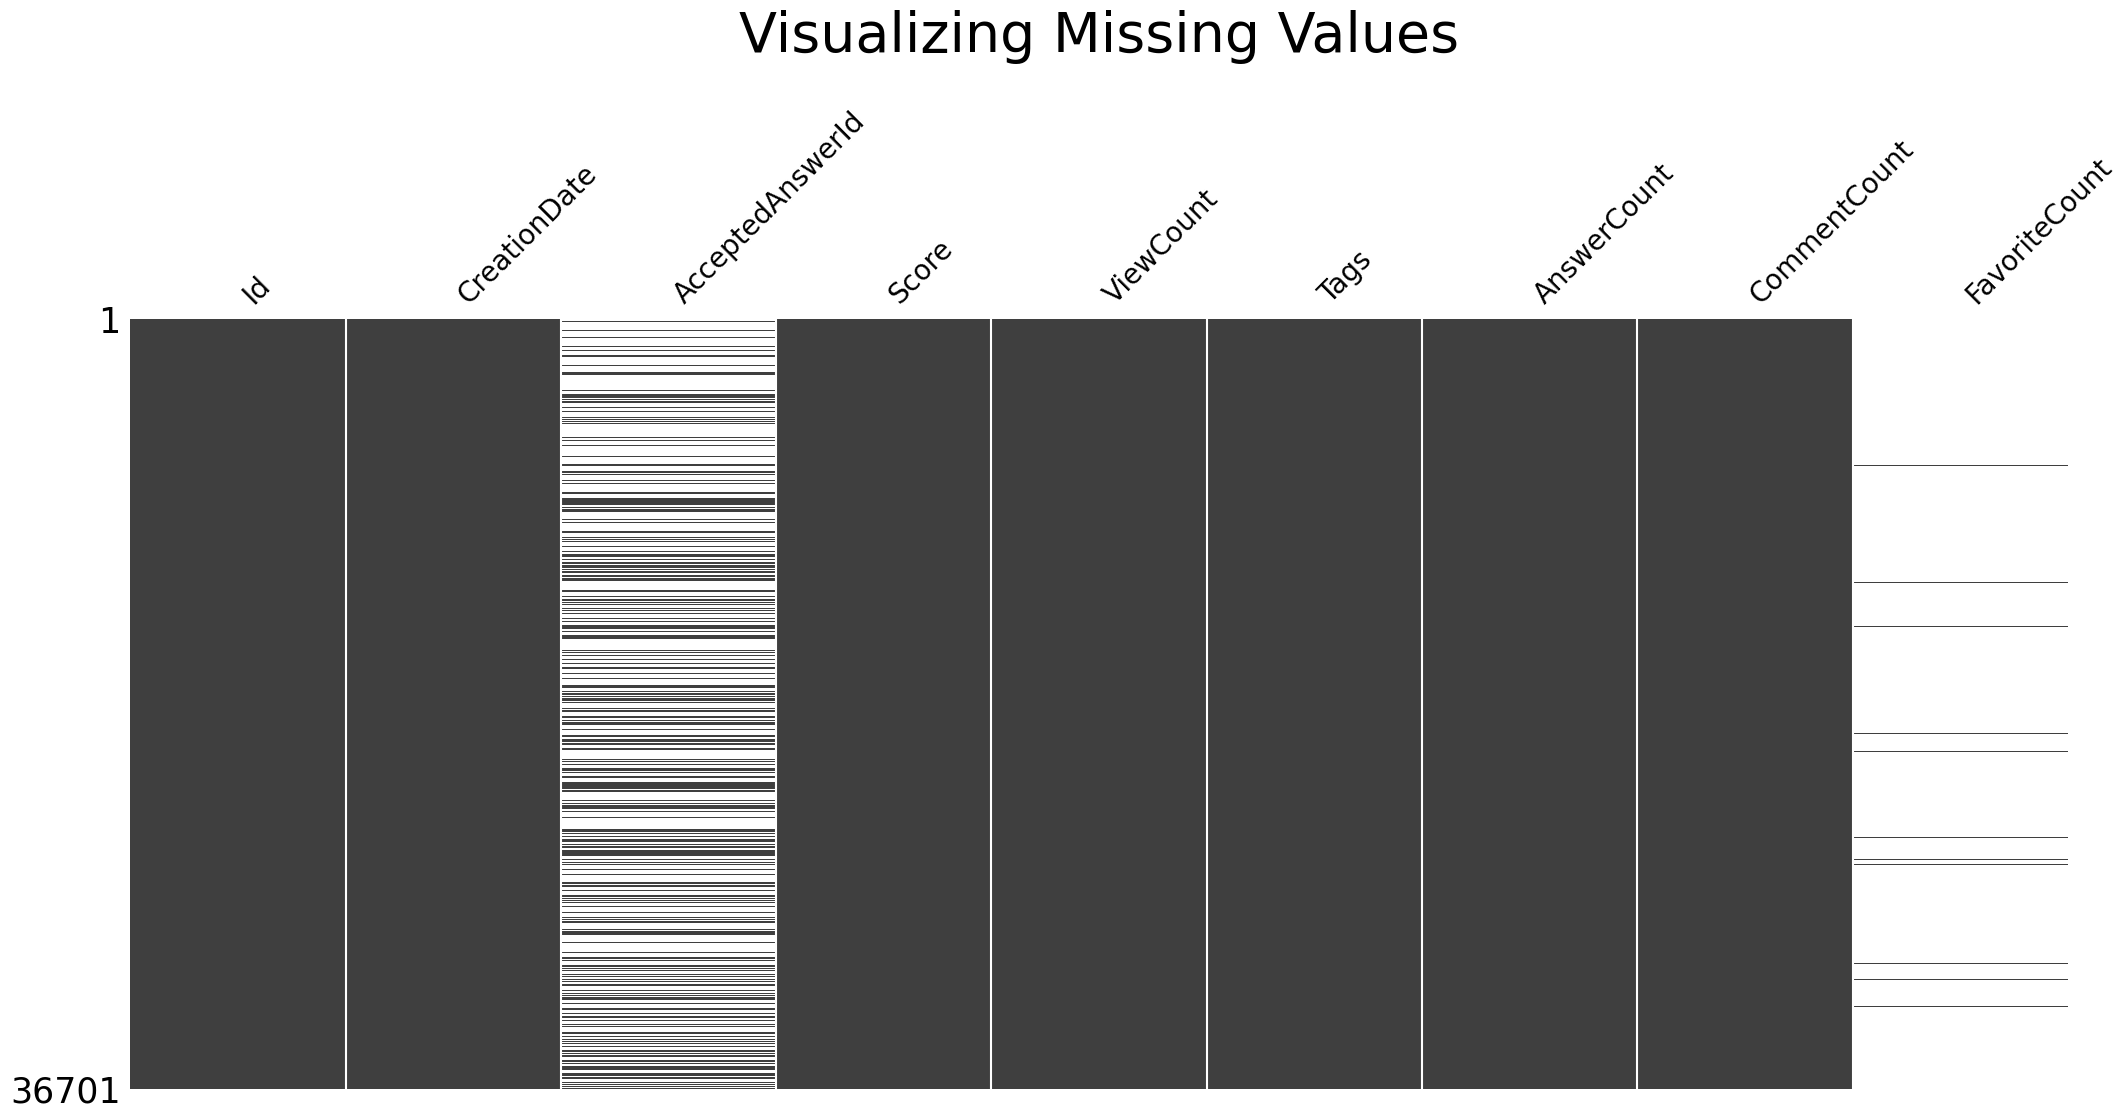

In [5]:
# Checking the number of entries
print('Number of question posts ', len(all_questions))

print(f'\nNumber of missing values:\n{all_questions.isnull().sum()}' )

print(f'\nPercentage of missing values:\n{round(100 * all_questions.isnull().sum()/len(all_questions))}' )

# Visualizing missing values by means of the missingno library
msno.matrix(
            all_questions, 
            fontsize=20,
            sparkline=False
            ) 
plt.title('Visualizing Missing Values', fontsize=40, pad=40)
plt.show()


We have two columns with NaN values, being `AcceptedAnswerId` (67% NaN) and `FavoriteCount` (98% NaN). We should drop both of these columns as the first has no way of being fixed and the second is almost empty.

Lastly, let's check the data type of each column and see if anything needs changing.

In [6]:
all_questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36701 entries, 0 to 36700
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                36701 non-null  int64  
 1   CreationDate      36701 non-null  object 
 2   AcceptedAnswerId  12093 non-null  float64
 3   Score             36701 non-null  int64  
 4   ViewCount         36701 non-null  int64  
 5   Tags              36701 non-null  object 
 6   AnswerCount       36701 non-null  int64  
 7   CommentCount      36701 non-null  int64  
 8   FavoriteCount     585 non-null    float64
dtypes: float64(2), int64(5), object(2)
memory usage: 2.5+ MB


We can see that `CreationDate` is of type object rather than datetime. We should fix this as well.

## Cleaning the Data
Now let's go ahead and make these changes.

First, we're going to clean the `tags` column.

In [7]:
all_questions['Tags'] = all_questions['Tags'].str.replace('><',',')\
                                               .str.replace('<', '')\
                                               .str.replace('>', '')\
                                               .str.split(',')

Next, let's drop both the `AcceptedAnswerId` and `FavoriteCount` columns.

In [8]:
all_questions.drop(['AcceptedAnswerId', 'FavoriteCount'], axis=1, inplace=True)
all_questions.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,CommentCount
0,126612,2024-01-26 18:53:32,0,20,"[machine-learning, neural-network]",0,0
1,126611,2024-01-26 16:12:49,0,14,"[statistics, excel, project-planning]",0,0
2,126610,2024-01-26 15:30:41,0,16,"[machine-learning, classification, probability...",0,0
3,126609,2024-01-26 15:28:04,0,10,"[generative-models, score, density-estimation,...",0,0
4,126604,2024-01-26 05:17:00,3,568,[batch-normalization],1,1


Lastly, let's change the type of `CreationDate` to datetime.

In [9]:
all_questions['CreationDate'] = all_questions['CreationDate'].astype('datetime64[ns]')
all_questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36701 entries, 0 to 36700
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            36701 non-null  int64         
 1   CreationDate  36701 non-null  datetime64[ns]
 2   Score         36701 non-null  int64         
 3   ViewCount     36701 non-null  int64         
 4   Tags          36701 non-null  object        
 5   AnswerCount   36701 non-null  int64         
 6   CommentCount  36701 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 2.0+ MB


___

## Finding Most Popular Tags
With our dataframe cleaned, we are ready to begin our analysis. We'll start by investigating which tags are most popular. 

We can determine this by examining the following columns:
* `Score`
* `ViewCount`
* `AnswerCount`
* `CommentCount`

To further narrow our analysis, let's focus on questions from 2023 (at the time of writing it is early 2024) for the time being.

In [10]:
questions_2023 = all_questions[all_questions['CreationDate'].apply(lambda cd: cd.year == 2023)]

questions_2023[['Score', 'ViewCount', 'AnswerCount', 'CommentCount']].describe()

,Score,ViewCount,AnswerCount,CommentCount
count,3432.000000,3432.000000,3432.000000,3432.000000
mean,0.300699,131.006993,0.517774,0.635781
std,0.874803,583.757804,0.699110,1.317851
min,-3.000000,3.000000,0.000000,0.000000
25%,0.000000,20.000000,0.000000,0.000000
50%,0.000000,37.000000,0.000000,0.000000
75%,0.000000,79.000000,1.000000,1.000000
max,17.000000,16252.000000,7.000000,11.000000


**Observations**
* `Score` ranges from -3 to 17, but most questions (75%) have a score of 0.
* `ViewCount` ranges from 3 to 16252 with a mean of 131.
* `AnswerCount` ranges from 0 to 7 with half of questions being unanswered.
* `CommentCount` ranges from 0 to 11 with half of questions having no comments.

Next, let's find how often each tag appears and tally up the aforementioned columns for each tag as well.

In [11]:
# This function is used later in this project
def get_tag_ft(df):
    # Seperating tags
    tag_list = []
    for lst in df['Tags']:
        for tag in lst:
            tag_list.append(tag)

    # Creating Frequency Table for each tag
    tag_vc = pd.Series(tag_list).value_counts()
    tag_metrics = pd.DataFrame({'Tag': tag_vc.index, 'Count': tag_vc.values})
    return tag_metrics 

tag_metrics_2023 = get_tag_ft(questions_2023)


# Totaling Score, ViewCount, AnswerCount, & CommentCount for each tag
tag_total_scores = []
tag_total_view_counts = []
tag_total_answer_counts = []
tag_total_comment_counts = []
for tag in tag_metrics_2023['Tag']:
    questions_with_tag = questions_2023[questions_2023['Tags'].apply(lambda lst: tag in lst)]
    qwt_sums = questions_with_tag[['Score', 'ViewCount', 'AnswerCount', 'CommentCount']].sum()
    tag_total_scores.append(qwt_sums['Score'])
    tag_total_view_counts.append(qwt_sums['ViewCount'])
    tag_total_answer_counts.append(qwt_sums['AnswerCount'])
    tag_total_comment_counts.append(qwt_sums['CommentCount'])

# Adding new metrics
tag_metrics_2023['Total Score'] = pd.Series(tag_total_scores)
tag_metrics_2023['Total Views'] = pd.Series(tag_total_view_counts)
tag_metrics_2023['Total Answers'] = pd.Series(tag_total_answer_counts)
tag_metrics_2023['Total Comments'] = pd.Series(tag_total_comment_counts)

tag_metrics_2023.head()

,Tag,Count,Total Score,Total Views,Total Answers,Total Comments
0,machine-learning,891,281,98308,531,644
1,python,509,136,71124,254,293
2,deep-learning,437,126,42391,204,299
3,nlp,333,184,101418,207,226
4,neural-network,281,70,32971,148,211


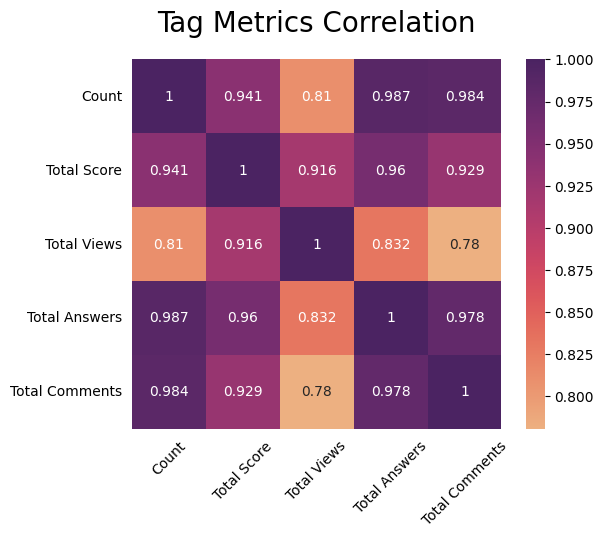

In [12]:
ax = sns.heatmap(
                 tag_metrics_2023[['Count', 'Total Score', 'Total Views', 'Total Answers', 'Total Comments']].corr(),
                 annot=True,
                 fmt='.3g', 
                 square=True,
                 cmap='flare'
                 )
ax.set_title('Tag Metrics Correlation', fontsize=20, pad=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.tick_params(bottom=False, left=False)

It appears our hypothesis is correct that `Score`, `ViewCount`, `AnswerCount`, and `CommentCount` have a strong positive correlation with the popularity of a tag. This means that the more a tag is used, the more it will accumulate scores, views, answers, and comments.

Next let's find the most popular tag.

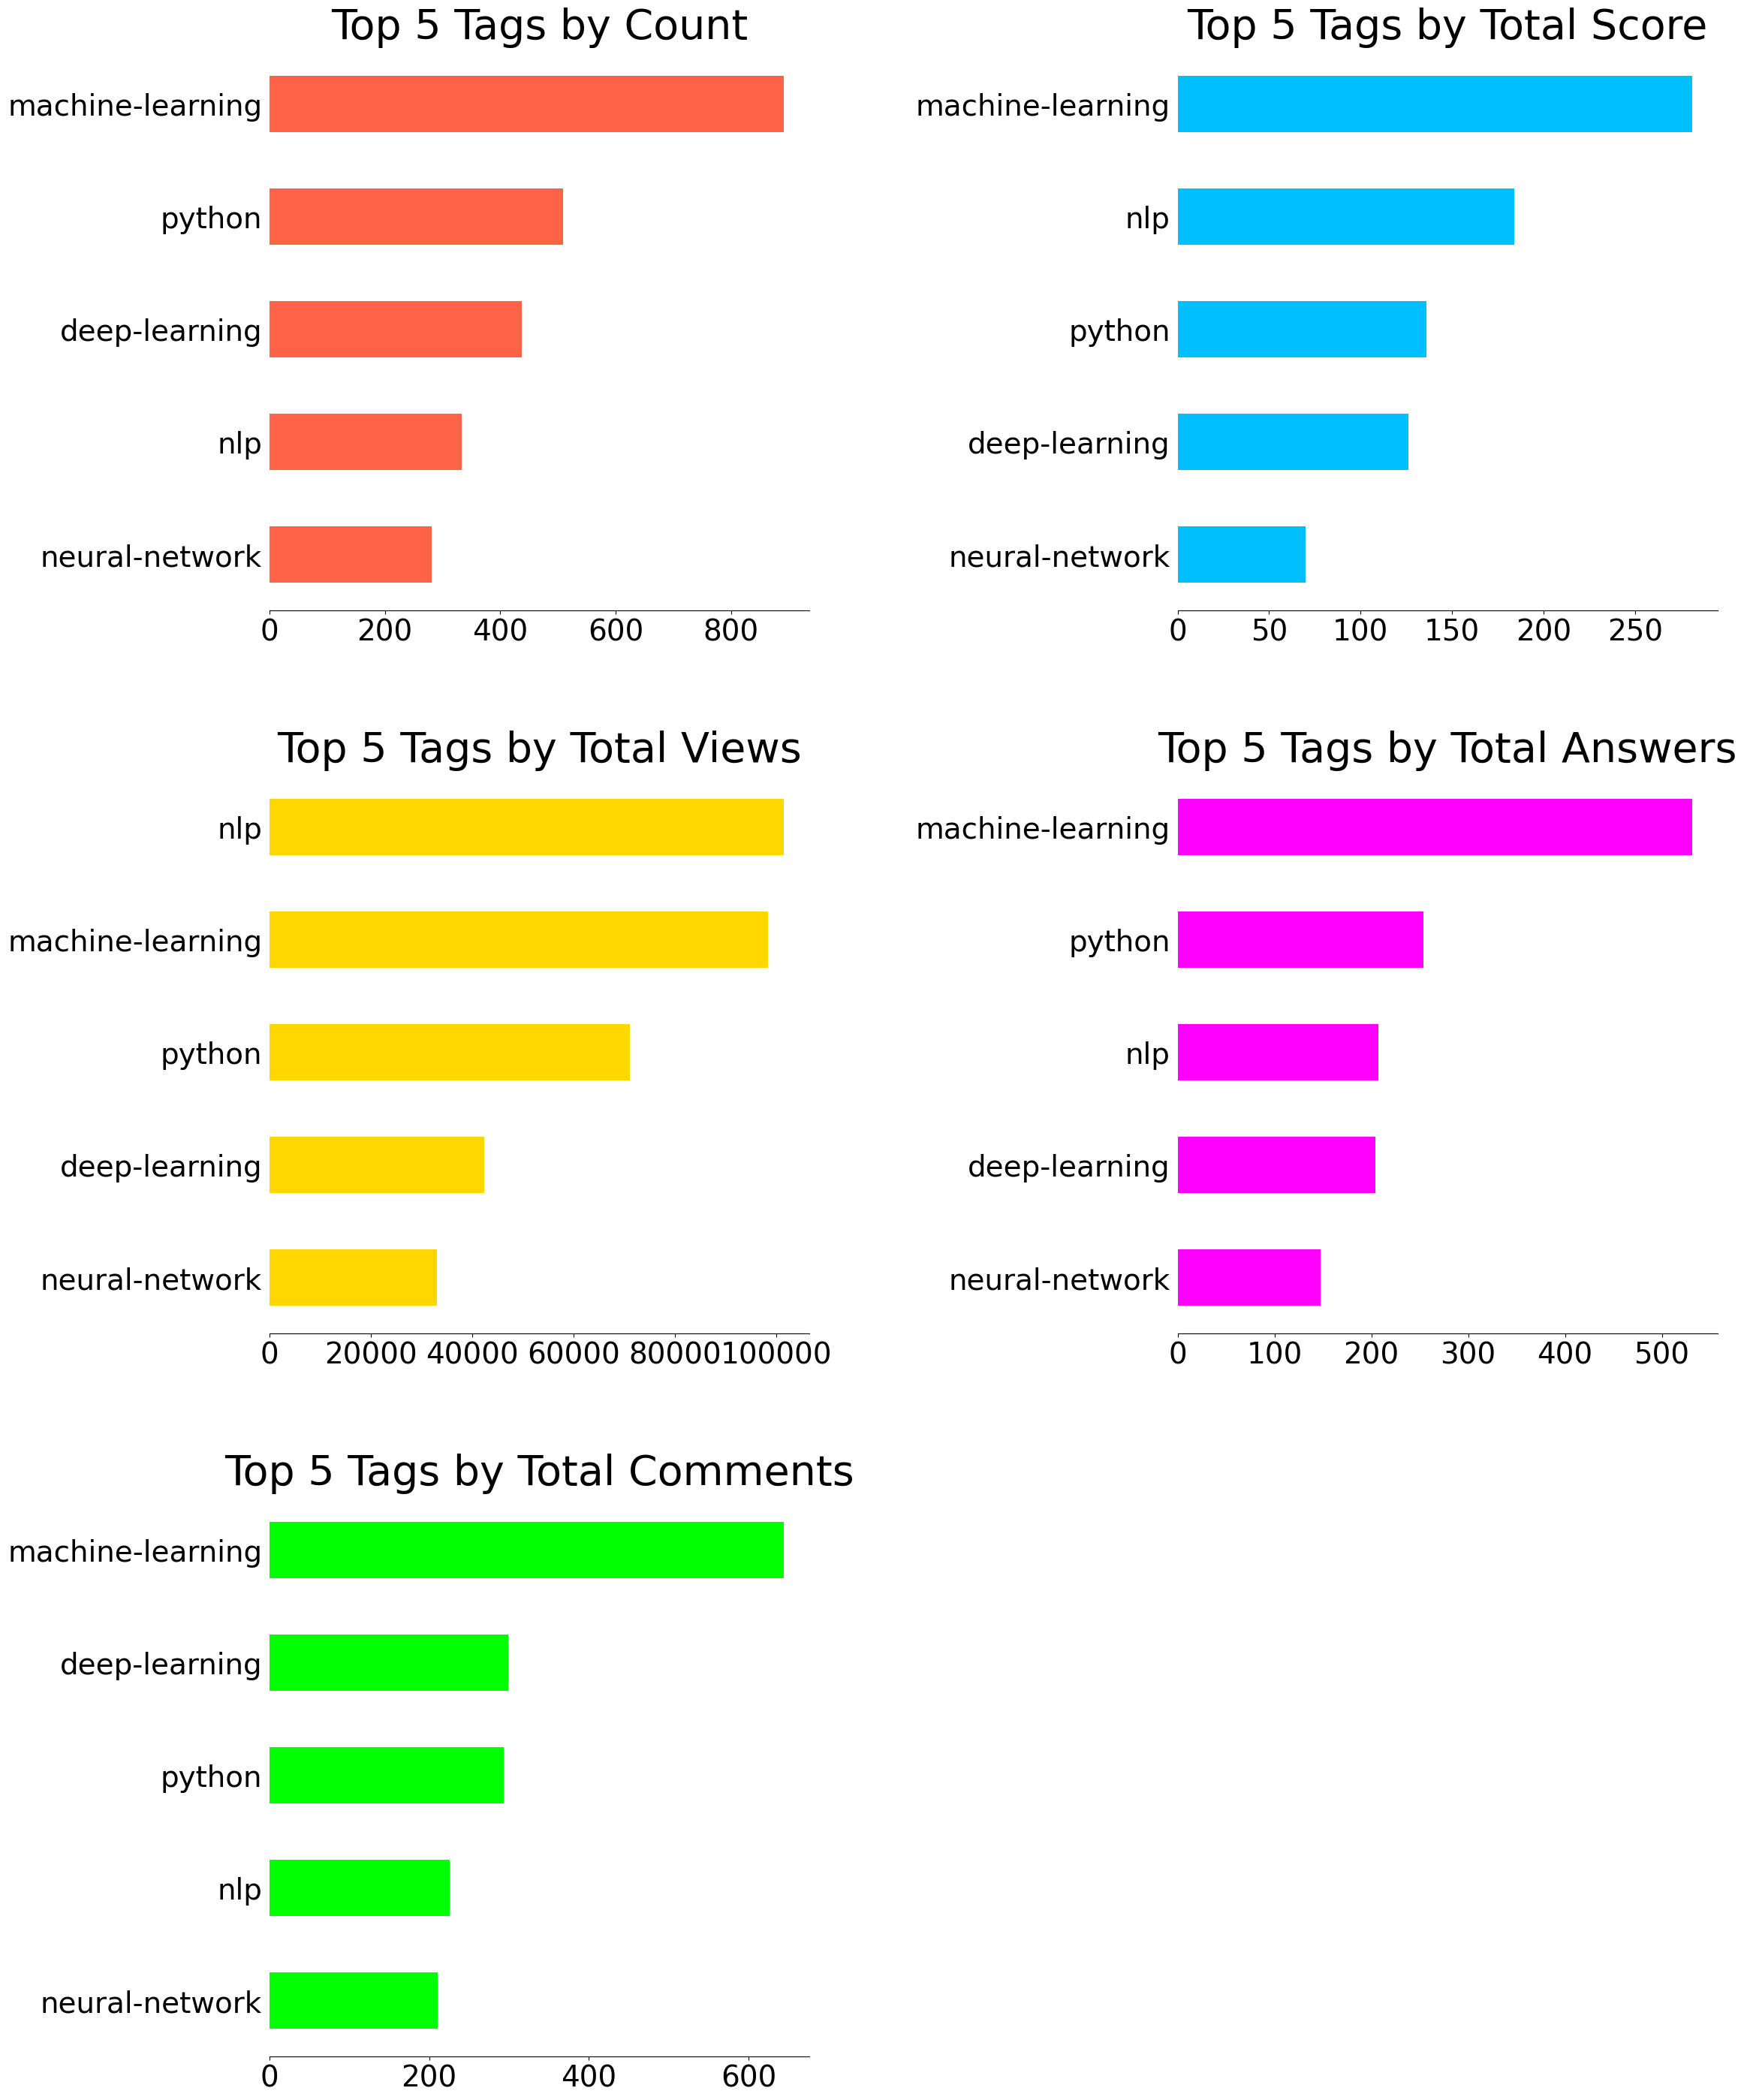

In [13]:
top_5_tags_by_count = tag_metrics_2023[['Tag','Count']].head().sort_values(by='Count', ascending=False)

metric_cols = ['Count', 'Total Score', 'Total Views', 'Total Answers', 'Total Comments']
colors = ['tomato', 'deepskyblue', 'gold', 'magenta', 'lime']

fig = plt.figure(figsize=(25, 30))
for i in range(0, 5):
    ax = fig.add_subplot(3, 2, i+1)
    m_col = metric_cols[i]
    top_5_tags_by_metric = tag_metrics_2023[['Tag', m_col]].head().sort_values(by=m_col)
    top_5_tags_by_metric.set_index('Tag', drop=True, inplace=True)
    top_5_tags_by_metric[m_col].plot.barh(
                                   color=colors[i],
                                   rot=0
                                   )
    title = f'Top 5 Tags by {m_col}'
    ax.set_title(title, fontsize=40)
    ax.set_ylabel(None)
    ax.set_xlabel(None)
    ax.tick_params(axis='both', labelsize=28, left = False)
    
    for j in ['top', 'right', 'left']:
        ax.spines[j].set_visible(False)
    plt.tight_layout(pad=8)  

We can see that `machine-learning` is the most popular tag.
___

## Machine Learning Across Time
To ensure `machine-learning` is not just a fad, let's see how it fairs across time by comparing from year to year.

Let's find out what the earliest and latests dates we have are.

In [14]:
all_questions.head(1)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,CommentCount
0,126612,2024-01-26 18:53:32,0,20,"[machine-learning, neural-network]",0,0


In [15]:
all_questions.tail(1)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,CommentCount
36700,5,2014-05-13 23:58:30,9,953,[machine-learning],1,1


Since 2014 and 2024 are not complete years (at the time of writing it is early 2024), we will disregard them as we don't want them skewing our results.

Let's find out what the top three most popular tags are on DSSE.

In [16]:
questions_2015_to_2023 = all_questions[all_questions['CreationDate'].apply(lambda cd: 2014 < cd.year < 2024)]
tag_ft_2015_to_2023 = get_tag_ft(questions_2015_to_2023)
tag_ft_2015_to_2023.head(3)

,Tag,Count
0,machine-learning,11118
1,python,6616
2,deep-learning,4824


Now let's see how these five tags compare with one another from year to year.

In [17]:
# questions_2015 = all_questions[all_questions['CreationDate'].apply(lambda cd: cd.year == 2015)]
# questions_2016 = all_questions[all_questions['CreationDate'].apply(lambda cd: cd.year == 2016)]
# questions_2017 = all_questions[all_questions['CreationDate'].apply(lambda cd: cd.year == 2017)]
# questions_2018 = all_questions[all_questions['CreationDate'].apply(lambda cd: cd.year == 2018)]
# questions_2019 = all_questions[all_questions['CreationDate'].apply(lambda cd: cd.year == 2019)]
# questions_2020 = all_questions[all_questions['CreationDate'].apply(lambda cd: cd.year == 2020)]
# questions_2021 = all_questions[all_questions['CreationDate'].apply(lambda cd: cd.year == 2021)]
# questions_2022 = all_questions[all_questions['CreationDate'].apply(lambda cd: cd.year == 2022)]
# We already have the data extracted for 2023

In [18]:
# tag_ft_2015 = get_tag_ft(questions_2015)
# tag_ft_2016 = get_tag_ft(questions_2016)
# tag_ft_2017 = get_tag_ft(questions_2017)
# tag_ft_2018 = get_tag_ft(questions_2018)
# tag_ft_2019 = get_tag_ft(questions_2019)
# tag_ft_2020 = get_tag_ft(questions_2020)
# tag_ft_2021 = get_tag_ft(questions_2021)
# tag_ft_2022 = get_tag_ft(questions_2022)
# tag_ft_2023 = get_tag_ft(questions_2023)

# tag_ft_2019[tag_ft_2019['Tag'] != 'machine-learning']['Count'].values[0]

tag_cols = tag_ft_2015_to_2023['Tag'].head(3).values

compare_dict = {'Year': []}
for y in range(2015,2024):
    questions_year = all_questions[all_questions['CreationDate'].apply(lambda cd: cd.year == y)]
    tag_ft_year = get_tag_ft(questions_year)
    
    compare_dict['Year'].append(y)
    
    for tag in tag_cols:
        tag_count = tag_ft_year[tag_ft_year['Tag'] == tag]['Count'].values[0]
        if tag in compare_dict:
            compare_dict[tag].append(tag_count)
        else:
            compare_dict[tag] = [tag_count]

compare_df = pd.DataFrame(compare_dict)
compare_df

,Year,machine-learning,python,deep-learning
0,2015,396,130,30
1,2016,664,313,158
2,2017,995,473,422
3,2018,1859,1057,896
4,2019,2129,1439,894
5,2020,1887,1203,842
6,2021,1312,900,683
7,2022,985,592,462
8,2023,891,509,437


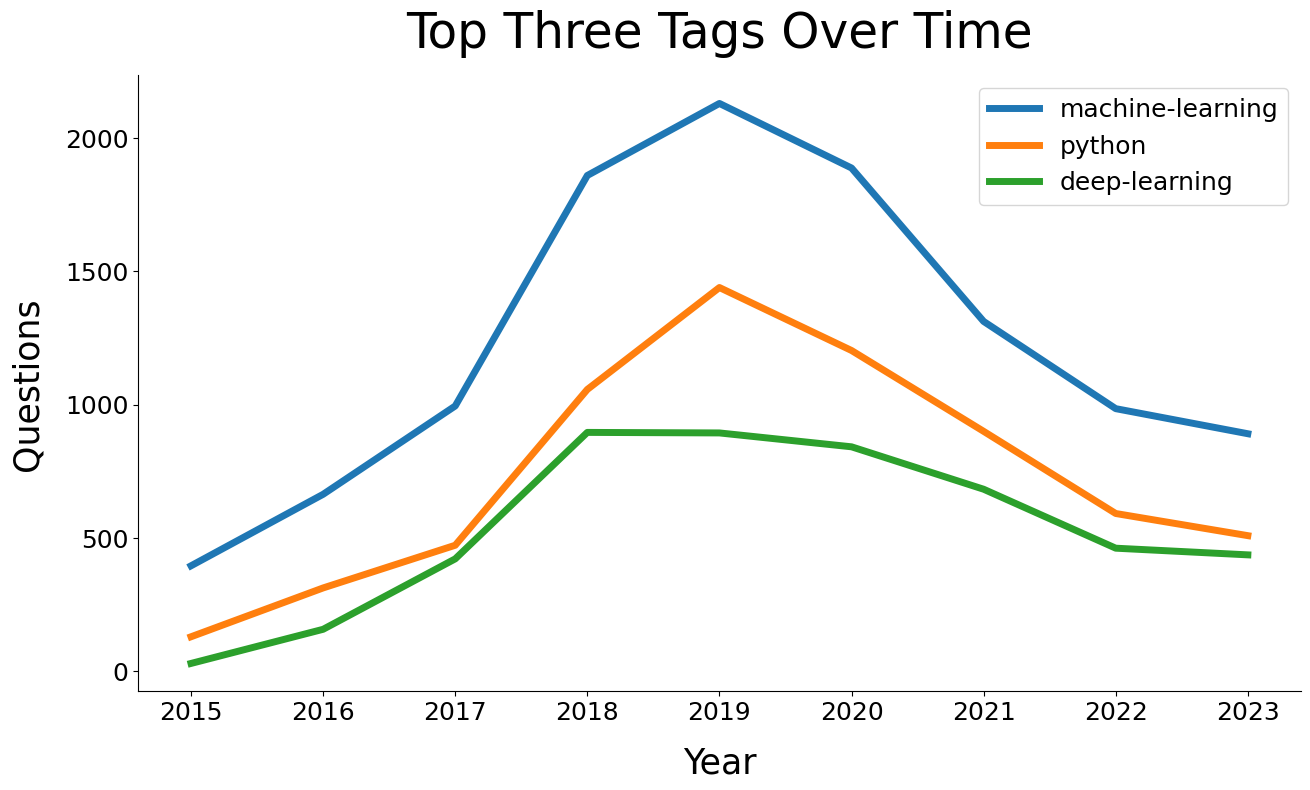

In [19]:
compare_df.plot(x='Year', y=tag_cols, figsize=(15,8), legend=True, fontsize=18, lw=5)
plt.title('Top Three Tags Over Time', fontsize=35, pad=20)
plt.xlabel('Year', fontsize=25, labelpad=15)
plt.ylabel('Questions', fontsize=25, labelpad=15) 
plt.legend(fontsize = 18)
sns.despine()

We can see that `machine-learning` has been the most popular topic each year, altough we are seeing a decline in the number of questions asked with this tag since 2019.
___

## Conclusion
In this project, we aimed to identify what data science content people would be most interested in learning. After our analysis, it appears that `machine-learning` is the most popular data science topic.